In [ ]:
import sys
from src.chords_detection import ChordsAnalizer
from src.features_recognizer import FeaturesRecognizer
import librosa, librosa.display

HOP_LENGTH = 256
BUFF_SIZE = 1024 * 8
CHANNELS = 1 if sys.platform == "darwin" else 2
SAMPLE_RATE = 44100

user_name = input('Please specify the user name.')
record_name = input('Please specify the record name.')

with open(f'./streamed_chords/{record_name}.csv', 'w+', encoding='utf-8') as csv_output:
    chords_recognizer = FeaturesRecognizer(hop_length=256)
    chords_analyzer = ChordsAnalizer(chords_recognizer, BUFF_SIZE, CHANNELS, SAMPLE_RATE)
    try:
        chords_analyzer.record_chords(csv_output, user_name, record_name)
    except KeyboardInterrupt:
        output_path = chords_analyzer.stop_audio_stream()
        print('Saved to:', csv_output.name)
        
final_chroma = chords_analyzer.build_final_chroma(output_path)

Detecting chords:
{'current_chord': 'G', 'repeates': 12, 'frame': 27}
{'current_chord': 'Am', 'repeates': 12, 'frame': 40}
{'current_chord': 'F', 'repeates': 14, 'frame': 54}
{'current_chord': 'C', 'repeates': 12, 'frame': 66}
{'current_chord': 'G', 'repeates': 12, 'frame': 79}
{'current_chord': 'Am', 'repeates': 13, 'frame': 92}
{'current_chord': 'F', 'repeates': 13, 'frame': 105}
{'current_chord': 'C', 'repeates': 12, 'frame': 118}
{'current_chord': 'G', 'repeates': 12, 'frame': 131}
Audio stream is closed. File with chords was saved succesfully.
Saved to: ./streamed_chords/test3.csv


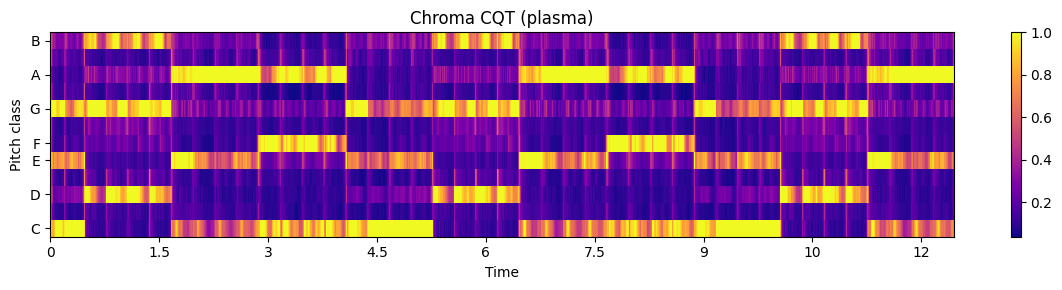

In [5]:
import matplotlib.pyplot as plt

def build_final_chroma(path):
    """
    Generate chroma feature from an audio file.
    Args:
        path (str): Path to the audio file.   
    Returns:
        np.ndarray: Chroma feature array.
    """
    y, sr = librosa.load(path)
    y_trimmed, _ = librosa.effects.trim(y, top_db=10)
    return librosa.feature.chroma_cqt(y=y_trimmed, sr=sr)

final_chroma = build_final_chroma(output_path)

def plot_chroma(chorma, name, cmap='plasma'):
    """
    Plot chroma feature.
    Args:`
        chorma (np.ndarray): Chroma feature array.
        name (str): Name of the chroma feature.
        cmap (str): Color map.
    """
    plt.figure(figsize=(12, 3))
    librosa.display.specshow(chorma, x_axis='time', y_axis='chroma', hop_length=HOP_LENGTH, cmap=cmap)
    plt.colorbar()
    plt.title(f'Chroma {name} ({cmap})')
    plt.tight_layout()
    plt.show()
    
plot_chroma(final_chroma, 'CQT')